In [1]:
# Importing all libraries required in this notebook #thankyou
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


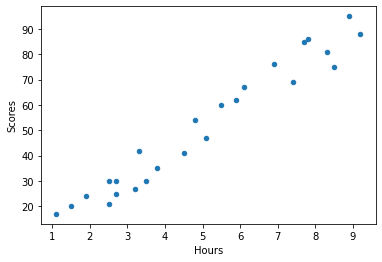

In [6]:
data.plot(kind='scatter', x='Hours',y='Scores');
plt.show()

In [9]:
data.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
data.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [11]:
hours=data['Hours']
scores=data['Scores']

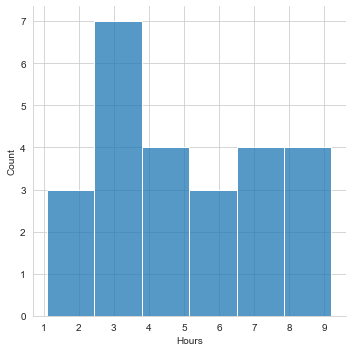

In [37]:
sns.displot(hours)

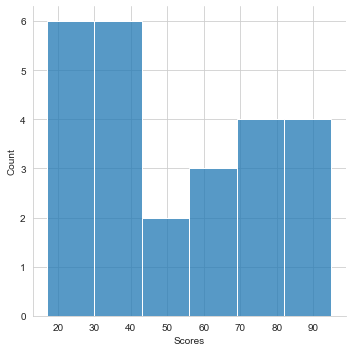

In [38]:
sns.displot(scores)

In [21]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=50)

In [25]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

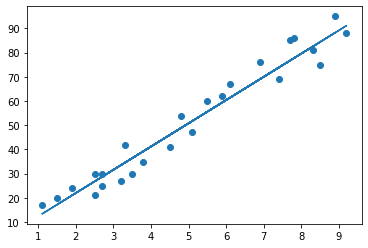

In [28]:
m=reg.coef_
c=reg.intercept_
line=m*x+c
plt.scatter(x,y)
plt.plot(x, line)
plt.show()

In [29]:
 y_pred=reg.predict(x_test)

In [30]:
actual_predicted=pd.DataFrame({'Target':y_test,'Predicted':y_pred})
actual_predicted
#dictionary

,Target,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


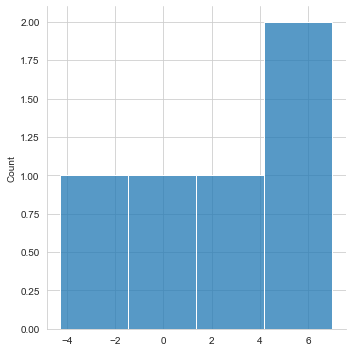

In [39]:
sns.set_style('whitegrid')
sns.displot(np.array(y_test-y_pred))
plt.show()

In [34]:
#What would be the predicted score if a student studies for 9.25 hours/day?
h=9.25
s=reg.predict([[h]])
print("If a student studies for {} hours per day he/she will score {} % in exam.".format(h,s))

If a student studies for 9.25 hours per day he/she will score [91.56986604] % in exam.


In [36]:
#model evaluation
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absoulute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absoulute Error: 4.5916495300630285
R2 Score: 0.971014141329942
